In [2]:
%pip install gurobipy
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [3]:
rnd = np.random
rnd.seed(51)

In [4]:
n = 10  # number of clients
f = 5  # number of charging stations
num_points = n + f + 1

# Generate random coordinates for xc and yc
xc = np.random.rand(num_points) * 200
yc = np.random.rand(num_points) * 100

# Randomly select f points from the generated points
selected_indices = np.random.choice(num_points, f, replace=False)
selected_xc = xc[selected_indices]
selected_yc = yc[selected_indices]

# Remove the selected points from xc and yc
xc = np.delete(xc, selected_indices)
yc = np.delete(yc, selected_indices)
xc=np.append(xc,xc[0])
yc=np.append(yc,yc[0])

print(xc)
print(yc)
num_of_copies = 3
# Append copies of each selected point after the first n points
for i in range(f):
    for _ in range(num_of_copies):
        xc = np.append(xc, selected_xc[i])
        yc = np.append(yc, selected_yc[i])
print("Remaining xc:", xc)
print("Remaining yc:", yc)

[  8.94243644 128.8039454   56.84259975 189.86756133  31.53403375
  77.59459248  97.55915826  43.63651224 129.34910884  49.96628183
   9.5451566    8.94243644]
[29.22017587  6.02748056 75.46383918 72.87108304 56.47609387 71.41213954
 63.91391136 86.94905599 34.99918982 30.78997273 37.21481787 29.22017587]
Remaining xc: [  8.94243644 128.8039454   56.84259975 189.86756133  31.53403375
  77.59459248  97.55915826  43.63651224 129.34910884  49.96628183
   9.5451566    8.94243644 135.1462831  135.1462831  135.1462831
  82.04959722  82.04959722  82.04959722  68.66073451  68.66073451
  68.66073451 117.99873529 117.99873529 117.99873529  34.8686772
  34.8686772   34.8686772 ]
Remaining yc: [29.22017587  6.02748056 75.46383918 72.87108304 56.47609387 71.41213954
 63.91391136 86.94905599 34.99918982 30.78997273 37.21481787 29.22017587
 32.3548296  32.3548296  32.3548296  60.3723935  60.3723935  60.3723935
 44.54105029 44.54105029 44.54105029 58.23560806 58.23560806 58.23560806
 79.51987286 79.51

27


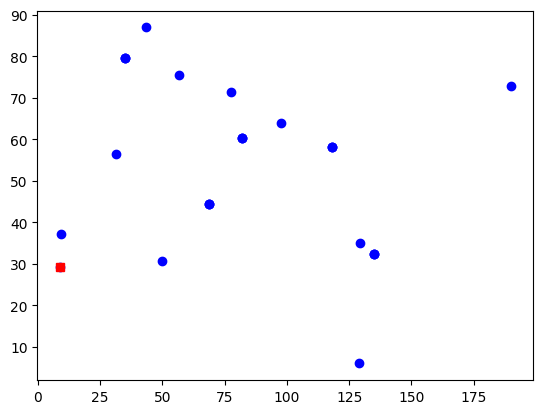

In [5]:
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')
print(len(xc))

In [6]:
I = [i for i in range(1, n+1)] #Number of nodes/locations
F = [i for i in range(n+2,n+2+num_of_copies*f)]
N = I + F
F_depo = [0] + F
I_depo = [0] + N
I_dest = N + [n+1]
I_depo_dest = N + [0] + [n+1]
print(I_dest)
A = [(i, j) for i in I_depo for j in I_dest if i != j] #every possible combination of i and j
c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in A} #Calculating cost values
C = 15                #Max capacity
q = {i: rnd.randint(1, 10) for i in N} #Alloting random values for demand to be fulfilled
# for _ in range()
Q = 500
H = 50 #Const discharging rate
max_value = max(c.values())
Q = H*1.1*max_value
print(I)
print(F)
print(N)
print(q)
q[0]=0
for i in range(n+1,n+2+num_of_copies*f):
    q[i] = 0
print(q)
print(Q)
Q=10000
print(n+1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 11]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
{1: 5, 2: 2, 3: 9, 4: 4, 5: 8, 6: 4, 7: 4, 8: 5, 9: 5, 10: 5, 12: 1, 13: 1, 14: 4, 15: 8, 16: 6, 17: 5, 18: 5, 19: 7, 20: 8, 21: 9, 22: 1, 23: 5, 24: 6, 25: 5, 26: 3}
{1: 5, 2: 2, 3: 9, 4: 4, 5: 8, 6: 4, 7: 4, 8: 5, 9: 5, 10: 5, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 0: 0, 11: 0}
10236.400251196
11


In [7]:
from gurobipy import Model, GRB, quicksum

model = Model('ECVRP')
x = model.addVars(A, vtype=GRB.BINARY, name='x')
u = model.addVars(I_depo_dest, vtype=GRB.CONTINUOUS,lb=0,ub=C, name='u')
y = model.addVars(I_depo_dest, vtype=GRB.CONTINUOUS,lb=0, ub=Q, name='y')
h = model.addVars(I_depo_dest, vtype=GRB.CONTINUOUS, name='h')

# for i in I_depo_dest:
#     h[i] = H + u[i] / C

model.modelSense = GRB.MINIMIZE
# u[0].setAttr(GRB.Attr.LB, C)
# u[0].setAttr(GRB.Attr.UB, C)
# y[0].setAttr(GRB.Attr.LB, Q)
# y[0].setAttr(GRB.Attr.UB, Q)

model.setObjective(quicksum(x[i, j]*c[i, j] for i, j in A))
model.addConstrs((quicksum(x[i, j] for j in I_dest if i!=j) == 1 for i in I), name='outgoing')
model.addConstrs((quicksum(x[i, j] for j in I_dest if i!=j) <= 1 for i in F), name='charging_outgoing')
model.addConstrs((quicksum(x[i,j] for i in I_depo if i!=j)-quicksum(x[j,i] for i in I_dest if i!=j) == 0 for j in N), name='blockage')
model.addConstrs((u[j]<=u[i]-q[i]*x[i,j]+ C*(1-x[i,j]) for i in I_depo for j in I_dest if i!=j), name='weight_transfer')
# model.addConstrs((u[i]>=0 for i in I_dest), name='weight_lower_bound')
# model.addConstrs((u[0]<=C), name='weight_upper_bound')
Temp = 323
theta = 0.1
H = H*0.8 + Temp*(theta)
model.addConstrs(h[i] == H + u[i] / C for i in I_depo_dest)
model.addConstrs((y[j]<=y[i]-h[i]*c[i,j]*x[i,j]+Q*(1-x[i,j]) for i in I for j in  I_dest if i!=j), name = 'charge_left')
model.addConstrs((y[j]<=Q-h[i]*c[i,j]*x[i,j] for i in F_depo for j in I_dest if i!=j), name='after leaving from charging station')
# model.addConstrs((y[i]>=0 for i in I_dest), name='charge_lower_bound')
# model.addConstrs((y[i]<=Q for i in N), name='charge_upper_bound')
# model.addConstr(u[0]==C, name='Specifying_constant_weight')
model.addConstr(y[0]==Q, name='Specifying_constant_charge')
model.addConstr(u[0]==C, name='Specifying_constant_weight')
model.Params.MIPGap = 0.1
model.Params.TimeLimit = 500  # seconds
model.optimize()
# optimal path -  active paths


Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-07


Set parameter MIPGap to value 0.1
Set parameter TimeLimit to value 500
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6500U CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 730 rows, 732 columns and 3884 nonzeros
Model fingerprint: 0x5c93bc70
Model has 651 quadratic constraints
Variable types: 81 continuous, 651 integer (651 binary)
Coefficient statistics:
  Matrix range     [7e-02, 2e+01]
  QMatrix range    [6e+00, 2e+02]
  QLMatrix range   [1e+00, 1e+04]
  Objective range  [6e+00, 2e+02]
  Bounds range     [1e+00, 1e+04]
  RHS range        [1e+00, 1e+04]
  QRHS range       [1e+04, 1e+04]
Presolve removed 67 rows and 49 columns
Presolve time: 0.03s
Presolved: 1819 rows, 1261 columns, 7102 nonzeros
Variable types: 613 continuous, 648 integer (632 binary)
Found heuristic solution: objective 1516.8337140
Found heuristic solution: objective 1136.53067

In [8]:
model.write("model3.lp")

In [9]:
for var_name in u:
    u_var = u[var_name]
    print(f"{var_name} = {u_var.X}")

1 = 5.0
2 = 9.999999999999773
3 = 9.0
4 = 15.0
5 = 8.0
6 = 15.0
7 = 15.0
8 = 11.0
9 = 15.0
10 = 4.999999999999773
12 = 0.0
13 = 9.0
14 = 9.999999999999773
15 = 0.0
16 = 15.0
17 = 0.0
18 = 0.0
19 = 0.0
20 = 0.0
21 = 11.0
22 = 11.0
23 = 11.0
24 = 15.0
25 = 0.0
26 = 15.0
0 = 15.0
11 = 0.0


In [10]:
for var_name in h:
    h_var = h[var_name]
    print(f"{var_name} = {h_var.X}")

1 = 72.63333333333335
2 = 72.96666666666667
3 = 72.90000000000002
4 = 73.30000000000001
5 = 72.83333333333334
6 = 73.30000000000001
7 = 73.30000000000001
8 = 73.03333333333335
9 = 73.30000000000001
10 = 72.63333333333334
12 = 72.30000000000001
13 = 72.90000000000002
14 = 72.96666666666667
15 = 72.30000000000001
16 = 73.30000000000001
17 = 72.30000000000001
18 = 72.30000000000001
19 = 72.30000000000001
20 = 72.30000000000001
21 = 73.03333333333335
22 = 73.03333333333335
23 = 73.03333333333335
24 = 73.30000000000001
25 = 72.30000000000001
26 = 73.30000000000001
0 = 73.30000000000001
11 = 72.30000000000001


In [11]:
for var_name in y:
    y_var = model.getVarByName(f"y[{var_name}]")
    print(f"{var_name} = {y_var.X}")

1 = 5234.924079725514
2 = 7411.76971226081
3 = 4990.855427424911
4 = 2725.028016830574
5 = 5868.97504520702
6 = 3024.327920337064
7 = 9157.631204219246
8 = 7358.926305425466
9 = 6244.747628189815
10 = 582.325366035664
12 = 0.0
13 = 0.0
14 = 0.0
15 = 0.0
16 = 0.0
17 = 0.0
18 = 0.0
19 = 0.0
20 = 0.0
21 = 0.0
22 = 0.0
23 = 0.0
24 = 0.0
25 = 0.0
26 = 0.0
0 = 10000.0
11 = 0.0


[(0, 4), (0, 6), (0, 9), (0, 24), (1, 19), (2, 5), (3, 12), (4, 10), (5, 11), (6, 21), (7, 2), (8, 1), (9, 14), (10, 11), (12, 11), (13, 3), (14, 13), (19, 20), (20, 11), (21, 22), (22, 23), (23, 8), (24, 7)]


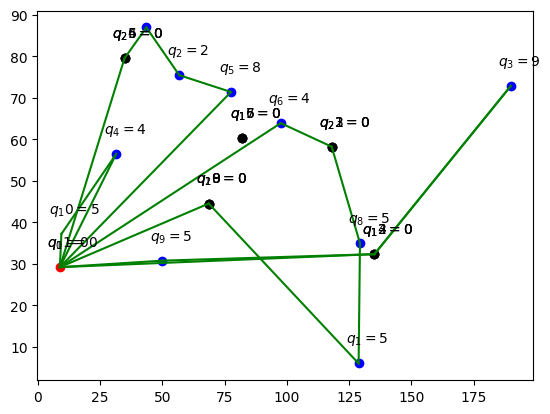

4


In [12]:
active_arcs = [a for a in A if x[a].x > 0.99]

print(active_arcs)
plt.scatter(xc[1:n], yc[1:n], c = 'b')
plt.scatter(xc[n+2:],yc[n+2:], c= 'black')
plt.scatter(xc[0], yc[0], c='r')

# plt.title('Optimal route with %s as max weight'%C, fontsize = 20)
for i in I_depo_dest:
    plt.annotate('$q_%d = %d$' % (i,q[i]), (xc[i]-5, yc[i]+5))
    # plt.annotate('$q_%d = %d$' % (i,y[i]), (xc[i]-5, yc[i]+5))
number_of_vehicles=0
for i,j in active_arcs:
    if(i==0):
        number_of_vehicles+=1
    plt.plot([xc[i],xc[j]], [yc[i], yc[j]], c = 'g')
plt.show()
print(number_of_vehicles)

In [13]:
values = {}
for i,j in active_arcs:
    if i!=0:
        values[i]=j
import random
colors = ['magenta', 'green', 'red', 'yellow', 'cyan']
def rec(i, j,col):
        print((i,j))
        plt.plot([xc[i],xc[j]], [yc[i], yc[j]], c = colors[col])
        if(j==11):
             return
        rec(j,values[j],col)


In [14]:
print(c[0,17])
print(c[0,6])
print(c[0,6]*51)
print(c[0,5]*h[5].X)

79.46771432662608
95.16605838557892
4853.468977664525
5868.97504520702


[(0, 4), (0, 6), (0, 9), (0, 24), (1, 19), (2, 5), (3, 12), (4, 10), (5, 11), (6, 21), (7, 2), (8, 1), (9, 14), (10, 11), (12, 11), (13, 3), (14, 13), (19, 20), (20, 11), (21, 22), (22, 23), (23, 8), (24, 7)]


<class 'list'>
(0, 4)
(4, 10)
(10, 11)
(0, 6)
(6, 21)
(21, 22)
(22, 23)
(23, 8)
(8, 1)
(1, 19)
(19, 20)
(20, 11)
(0, 9)
(9, 14)
(14, 13)
(13, 3)
(3, 12)
(12, 11)
(0, 24)
(24, 7)
(7, 2)
(2, 5)
(5, 11)


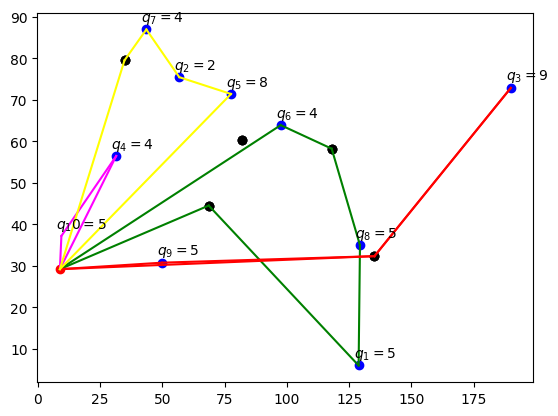

0


In [15]:
active_arcs = [a for a in A if x[a].x > 0.99]


print(active_arcs)
plt.scatter(xc[1:n], yc[1:n], c = 'b')
plt.scatter(xc[n+2:],yc[n+2:], c= 'black')
plt.scatter(xc[0], yc[0], c='r')

# plt.title('Optimal route with %s as max weight'%C, fontsize = 20)
visited = []
for i in I:
    if(xc[i] not in visited):
      plt.annotate('$q_%d = %d$' % (i,q[i]), (xc[i]-2, yc[i]+2))
      visited.append(xc[i])
    # plt.annotate('$q_%d = %d$' % (i,y[i]), (xc[i]-5, yc[i]+5))
import random

number_of_vehicles=0
col=0
print(type(active_arcs))
for i,j in active_arcs:
    if(i==0):
        rec(i,j,col)
        col+=1
plt.show()
print(number_of_vehicles)